In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [62]:
salaries= pd.read_csv('salary.csv')


## 1. Responders and Null values

There are 514 responders in this dataset.

In [63]:
salaries.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

only one Null type value is found in our data. It is in the salaries column. An error might have happened during collection of data or the individual may have refused to disclose their salary.

In [64]:
salaries[salaries.salary.isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [65]:
exec_average= salaries[salaries.position==3].salary.mean()
salaries=salaries.fillna(exec_average)


I decided to fill the Nan value with the average salary of executives since the only person currently is an executive.

## 2. Lowest salary and lowest salary in the group

In [66]:
print(f'Highest salary is ${salaries.salary.max()}')
print(f'Lowest salary is ${salaries.salary.min()}')

Highest salary is $96156.0
Lowest salary is $29000.0


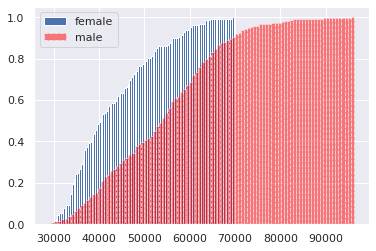

In [94]:
women= salaries[salaries.male==0].salary
men=salaries[salaries.male==1].salary

women.hist(cumulative=True, density=1, bins=100)
men.hist(cumulative=True, density=1, bins=100, alpha=0.5, color='red')

plt.legend(['female', 'male'])
plt.show()

Looking at the ECDFs (Emperical Cumulative Distribution Functions) shown above, we see that women typically earn less than their male counterparts.

## 3. mean salary of mean. plus standard error

In [98]:
mean= salaries.salary.mean()
print(f'mean salary is ${round(mean,2)}')


mean salary is $50883.29


In [99]:
standard_error= stats.sem(salaries.salary)
print(f'standard error of mean is {standard_error}')

standard error of mean is 559.331865713948


### 4. standard deviation for the years worked

In [100]:
salary_std= np.std(salaries.yearsworked)
print(f'standard deviation for years worked is {salary_std}')

standard deviation for years worked is 9.435503224576872


### 5. median salary

In [101]:
sort_salary= np.sort(salaries.salary)
median_salary=np.median(sort_salary)
print(f'The median salary is ${median_salary}')

#sort_salary

The median salary is $50165.5


This says to us that half of the people in our data earn below $50165.5 and the other half earn above it.

### 6. Interquartile Range salary

In [102]:
Q1_Q3= np.percentile(salaries['salary'], [25, 75], axis=0)
IQR= Q1_Q3[1]- Q1_Q3[0]
print(f'The Interquartile Range for salaries is ${IQR}')

The Interquartile Range for salaries is $20387.75


In [103]:
outliers_up= Q1_Q3[1]+1.5*IQR
outliers_down=Q1_Q3[0]-1.5*IQR


In [108]:
salaries[salaries.salary>outliers_up]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
280,91405.0,0,23,14,1.18,1,0,3,1,1,0
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


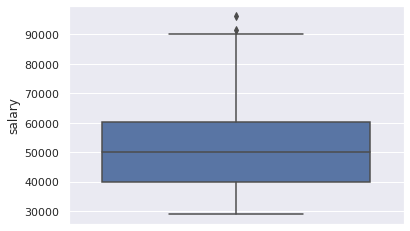

In [109]:
sns.boxplot(y=salaries.salary)
plt.show()

anyone earning above 90765.63 are considered to be outliers.

The Inter Quartile Range is best used when we have outliers in our data, as it only take into account the middle 50% of out data, neglecting the bottom and top 25%.

### 7. Distribution of Gender

In [110]:
number_to_gender= {
    0:'female',
    1:'male'
}
salaries['male']= salaries.male.map(number_to_gender)

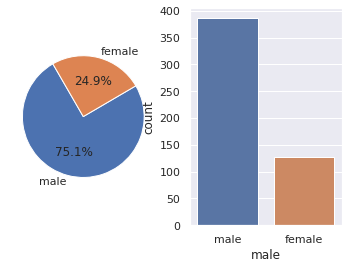

male      386
female    128
Name: male, dtype: int64

In [119]:
fig, axes = plt.subplots(1, 2)
axes[0].pie(salaries.male.value_counts(), labels= ['male', 'female'],autopct='%1.1f%%', labeldistance=1.1, startangle=120)
#plt.legend(['male', 'female'])

sns.countplot(x=salaries.male, ax=axes[1])
plt.show()
salaries.male.value_counts()

We see that there are 386 males and 128 females. This is roughly 75% males and 25% females, meaning that for every woman we have in our data, there are three men.

### 8. executives by gender

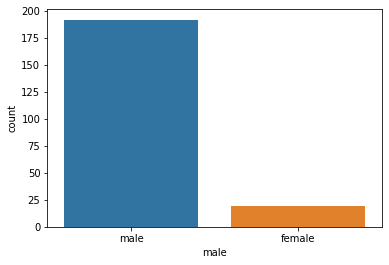

male      192
female     19
Name: male, dtype: int64

In [23]:
execs= salaries[salaries.position==3]
sns.countplot(execs.male)
plt.show()
execs.male.value_counts()

C-level jobs are still highly dominated by men. In this case there are 10 times more men than women.

### 9. Salaries histogram

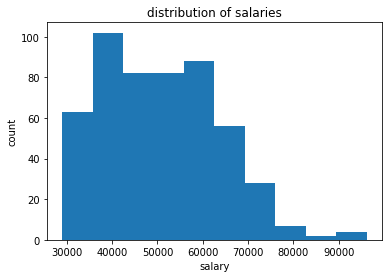

In [24]:
plt.hist(salaries.salary, bins=10)
plt.title('distribution of salaries')
plt.xlabel('salary')
plt.ylabel('count')
plt.show()


### 10. Decription of distribution of salaries

As expected, salaries are not distributed normally. The above graph shows that the salaries are skewed to the right. This is because higher level employees earn way more than the average person. Salaries can only get so low, whilst how much a person can make on the upside is infinite.

### 11. error bars

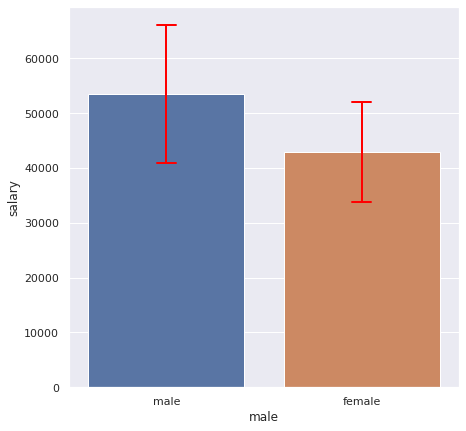

In [57]:
sns.set()
plt.figure(figsize=(7, 7))
sns.barplot(x="male", y="salary", data=salaries, errwidth=2, errcolor='red', capsize=0.1, ci='sd')

plt.show()


From the graph plotted above, it is easy to tell that women on average earn more than 10,000  less than their male counterparts. The short error bars show us that the different sample means from our data are not too spread out. Simply put, the different means are close to one another.
So chances are, if we repeat the data collection process again, our mean will have a 95% probablility of falling within the error bar.

### 12. scatter plot with trend line

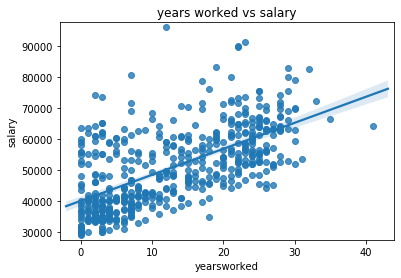

In [29]:
sns.regplot(x=salaries.yearsworked, y=salaries.salary)
plt.margins(0.02)
plt.title('years worked vs salary')
plt.show()

There seems to be a positive correlation between years worked and the salary earned by a person. The average starting salary is just below 40K . There are some outliers, like the one who earns more than $90k with just over 10 years of experience whilst peers at that level of experience earn around 50K. 

In [30]:
salaries[(salaries.salary>90000) & (salaries.market>1)]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
280,91405.0,0,23,14,1.18,1,0,3,male,1,0
377,96156.0,20,12,12,1.19,1,0,3,male,1,2


We can see that all the people who earn way above market salary are all executives (position 3). This is not surprising as they may be of bigger companies of part of the founding teams of companies which is why they get more than the average market salary.
All of them are male individuals with degrees.

In [31]:
above= salaries[salaries.market>1.33]
above.head(7)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
6,61008.0,0,2,2,1.33,1,0,1,male,2,0
24,61008.0,0,2,2,1.33,1,0,1,male,2,1
46,59110.0,0,4,4,1.33,1,0,1,male,1,0
65,63155.0,0,6,0,1.33,1,0,2,male,1,0
66,58118.0,0,5,5,1.33,1,0,1,male,1,0
178,59564.0,0,19,14,1.33,1,0,2,male,2,1
206,71543.0,13,7,7,1.33,1,1,3,male,2,3


of all of the people who earn 33% above their market average, they are all male and are in the fields of Engineering and finance.

In [32]:
salaries.market.max()

1.330000043

### 13. Pearson correlation

In [33]:
correlation, p_val= stats.pearsonr(salaries.yearsworked, salaries.salary)
print(f'correlation is {correlation} with a p-value of {p_val}')
round(p_val,60)

correlation is 0.624102296641541 with a p-value of 7.680408806637594e-57


7.679999999999999e-57

The correlation between years worked and salaries has a pearson correlation of 0.623 which means that there is a fairly strong positive correlation between these two variables. The more years one is on the job, the higher salary they should expect to be paid.

The p-value is so small (56th decimal point), which makes the chance that the correlation observed here happened by mere chance very slim.